In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})


train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()

#레이블
train_labels = train_dataset['local3']
test_labels = test_dataset['local3']

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model()

In [8]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 7s 3ms/step - loss: 12951508484096.0000 - mae: 1990783.2500 - mse: 12951508484096.0000 - val_loss: 7081977970688.0000 - val_mae: 1477366.0000 - val_mse: 7081977970688.0000
Epoch 2/1000
870/870 [==============================] - 2s 3ms/step - loss: 2195097780224.0000 - mae: 764674.5000 - mse: 2195097780224.0000 - val_loss: 890602192896.0000 - val_mae: 494124.1562 - val_mse: 890602192896.0000
Epoch 3/1000
870/870 [==============================] - 2s 3ms/step - loss: 726778707968.0000 - mae: 450355.0938 - mse: 726778707968.0000 - val_loss: 483488497664.0000 - val_mae: 372126.5312 - val_mse: 483488497664.0000
Epoch 4/1000
870/870 [==============================] - 2s 3ms/step - loss: 235157209088.0000 - mae: 250737.1562 - mse: 235157209088.0000 - val_loss: 82749489152.0000 - val_mae: 152647.8594 - val_mse: 82749489152.0000
Epoch 5/1000
870/870 [==============================] - 3s 3ms/step - loss: 48969371648.0000 - mae: 128452.1094 

870/870 [==============================] - 2s 3ms/step - loss: 16465240.0000 - mae: 1349.6040 - mse: 16465240.0000 - val_loss: 12917278.0000 - val_mae: 1124.9602 - val_mse: 12917278.0000
Epoch 41/1000
870/870 [==============================] - 2s 3ms/step - loss: 13581742.0000 - mae: 1229.5292 - mse: 13581742.0000 - val_loss: 10023778.0000 - val_mae: 926.2710 - val_mse: 10023778.0000
Epoch 42/1000
870/870 [==============================] - 2s 3ms/step - loss: 12128234.0000 - mae: 1212.2275 - mse: 12128234.0000 - val_loss: 11934820.0000 - val_mae: 1497.6033 - val_mse: 11934820.0000
Epoch 43/1000
870/870 [==============================] - 2s 3ms/step - loss: 10525643.0000 - mae: 1071.6125 - mse: 10525643.0000 - val_loss: 8098500.0000 - val_mae: 951.8699 - val_mse: 8098500.0000
Epoch 44/1000
870/870 [==============================] - 2s 3ms/step - loss: 9656996.0000 - mae: 1058.6173 - mse: 9656996.0000 - val_loss: 8415655.0000 - val_mae: 984.3947 - val_mse: 8415655.0000
Epoch 45/1000
870/

870/870 [==============================] - 2s 3ms/step - loss: 923982.9375 - mae: 491.6790 - mse: 923982.9375 - val_loss: 420890.8750 - val_mae: 292.3409 - val_mse: 420890.8750
Epoch 83/1000
870/870 [==============================] - 3s 3ms/step - loss: 1460887.5000 - mae: 508.3496 - mse: 1460887.5000 - val_loss: 345295.9375 - val_mae: 310.8071 - val_mse: 345295.9375
Epoch 84/1000
870/870 [==============================] - 3s 3ms/step - loss: 2832527.5000 - mae: 623.7260 - mse: 2832527.5000 - val_loss: 1259514.3750 - val_mae: 612.1385 - val_mse: 1259514.3750
Epoch 85/1000
870/870 [==============================] - 2s 3ms/step - loss: 466825.7812 - mae: 340.5546 - mse: 466825.7812 - val_loss: 453831.8750 - val_mae: 313.5261 - val_mse: 453831.8750
Epoch 86/1000
870/870 [==============================] - 2s 3ms/step - loss: 681608.3750 - mae: 401.1407 - mse: 681608.3750 - val_loss: 734128.9375 - val_mae: 436.9966 - val_mse: 734128.9375
Epoch 87/1000
870/870 [==============================

Epoch 125/1000
870/870 [==============================] - 3s 4ms/step - loss: 313885.5312 - mae: 300.8887 - mse: 313885.5312 - val_loss: 917080.5000 - val_mae: 546.0740 - val_mse: 917080.5000
Epoch 126/1000
870/870 [==============================] - 3s 3ms/step - loss: 1304912.1250 - mae: 520.9346 - mse: 1304912.1250 - val_loss: 330758.6875 - val_mae: 291.0417 - val_mse: 330758.6875
Epoch 127/1000
870/870 [==============================] - 3s 3ms/step - loss: 268800.5312 - mae: 279.2206 - mse: 268800.5312 - val_loss: 240156.9688 - val_mae: 380.8433 - val_mse: 240156.9688
Epoch 128/1000
870/870 [==============================] - 2s 3ms/step - loss: 781338.6875 - mae: 389.3061 - mse: 781338.6875 - val_loss: 110175.9219 - val_mae: 194.0485 - val_mse: 110175.9219
Epoch 129/1000
870/870 [==============================] - 3s 3ms/step - loss: 1220655.2500 - mae: 437.5132 - mse: 1220655.2500 - val_loss: 96409.7344 - val_mae: 155.0909 - val_mse: 96409.7344
Epoch 130/1000
870/870 [==============

Epoch 168/1000
870/870 [==============================] - 3s 3ms/step - loss: 309136.2500 - mae: 291.7632 - mse: 309136.2500 - val_loss: 280902.5625 - val_mae: 316.7887 - val_mse: 280902.5625
Epoch 169/1000
870/870 [==============================] - 3s 3ms/step - loss: 1461971.6250 - mae: 464.2137 - mse: 1461971.6250 - val_loss: 110873.2656 - val_mae: 198.1773 - val_mse: 110873.2656
Epoch 170/1000
870/870 [==============================] - 3s 3ms/step - loss: 141383.6094 - mae: 214.2174 - mse: 141383.6094 - val_loss: 772333.6250 - val_mae: 299.7881 - val_mse: 772333.6250
Epoch 171/1000
870/870 [==============================] - 2s 3ms/step - loss: 327049.7500 - mae: 308.1600 - mse: 327049.7500 - val_loss: 2571073.0000 - val_mae: 1078.0649 - val_mse: 2571073.0000
Epoch 172/1000
870/870 [==============================] - 3s 3ms/step - loss: 1090459.7500 - mae: 425.2561 - mse: 1090459.7500 - val_loss: 256675.7656 - val_mae: 375.9766 - val_mse: 256675.7656
Epoch 173/1000
870/870 [=========

Epoch 211/1000
870/870 [==============================] - 3s 3ms/step - loss: 1630701.7500 - mae: 379.6409 - mse: 1630701.7500 - val_loss: 80832.4141 - val_mae: 157.0948 - val_mse: 80832.4141
Epoch 212/1000
870/870 [==============================] - 3s 3ms/step - loss: 107770.5391 - mae: 189.2687 - mse: 107770.5391 - val_loss: 1746639.8750 - val_mae: 758.5919 - val_mse: 1746639.8750
Epoch 213/1000
870/870 [==============================] - 3s 3ms/step - loss: 310757.9062 - mae: 261.6865 - mse: 310757.9062 - val_loss: 330054.0000 - val_mae: 343.5110 - val_mse: 330054.0000
Epoch 214/1000
870/870 [==============================] - 3s 3ms/step - loss: 400018.9375 - mae: 292.0328 - mse: 400018.9375 - val_loss: 61049.7188 - val_mae: 151.3298 - val_mse: 61049.7188
Epoch 215/1000
870/870 [==============================] - 2s 3ms/step - loss: 543693.6875 - mae: 306.5940 - mse: 543693.6875 - val_loss: 105079.9609 - val_mae: 183.9847 - val_mse: 105079.9609
Epoch 216/1000
870/870 [================

Epoch 254/1000
870/870 [==============================] - 2s 2ms/step - loss: 931605.4375 - mae: 330.0588 - mse: 931605.4375 - val_loss: 75651.2266 - val_mae: 127.2734 - val_mse: 75651.2266
Epoch 255/1000
870/870 [==============================] - 2s 2ms/step - loss: 82478.2031 - mae: 165.4070 - mse: 82478.2031 - val_loss: 75014.2500 - val_mae: 143.9890 - val_mse: 75014.2500
Epoch 256/1000
870/870 [==============================] - 2s 2ms/step - loss: 1195193.2500 - mae: 396.4075 - mse: 1195193.2500 - val_loss: 235634.8750 - val_mae: 262.7215 - val_mse: 235634.8750
Epoch 257/1000
870/870 [==============================] - 2s 2ms/step - loss: 134160.5000 - mae: 203.3549 - mse: 134160.5000 - val_loss: 65501.7148 - val_mae: 140.0383 - val_mse: 65501.7148
Epoch 258/1000
870/870 [==============================] - 2s 2ms/step - loss: 2668079.2500 - mae: 446.0353 - mse: 2668079.2500 - val_loss: 67440.2656 - val_mae: 130.3182 - val_mse: 67440.2656
Epoch 259/1000
870/870 [======================

Epoch 297/1000
870/870 [==============================] - 2s 2ms/step - loss: 906151.7500 - mae: 320.0026 - mse: 906151.7500 - val_loss: 102945.6562 - val_mae: 204.4010 - val_mse: 102945.6562
Epoch 298/1000
870/870 [==============================] - 2s 2ms/step - loss: 431234.8438 - mae: 293.2022 - mse: 431234.8438 - val_loss: 46112.4961 - val_mae: 122.4534 - val_mse: 46112.4961
Epoch 299/1000
870/870 [==============================] - 2s 2ms/step - loss: 693431.3750 - mae: 373.8615 - mse: 693431.3750 - val_loss: 53255.2852 - val_mae: 143.7456 - val_mse: 53255.2852
Epoch 300/1000
870/870 [==============================] - 2s 2ms/step - loss: 138368.2344 - mae: 207.4719 - mse: 138368.2344 - val_loss: 760227.7500 - val_mae: 521.8001 - val_mse: 760227.7500
Epoch 301/1000
870/870 [==============================] - 2s 2ms/step - loss: 594336.6875 - mae: 344.9279 - mse: 594336.6875 - val_loss: 772589.8750 - val_mae: 454.4905 - val_mse: 772589.8750
Epoch 302/1000
870/870 [====================

Epoch 340/1000
870/870 [==============================] - 2s 2ms/step - loss: 363490.1562 - mae: 258.1029 - mse: 363490.1562 - val_loss: 4116042.7500 - val_mae: 1159.3612 - val_mse: 4116042.7500
Epoch 341/1000
870/870 [==============================] - 2s 2ms/step - loss: 300857.2812 - mae: 242.5125 - mse: 300857.2812 - val_loss: 244830.0938 - val_mae: 347.6689 - val_mse: 244830.0938
Epoch 342/1000
870/870 [==============================] - 2s 2ms/step - loss: 327119.2188 - mae: 264.4871 - mse: 327119.2188 - val_loss: 40480.7969 - val_mae: 102.4960 - val_mse: 40480.7969
Epoch 343/1000
870/870 [==============================] - 2s 2ms/step - loss: 519518.3750 - mae: 340.7545 - mse: 519518.3750 - val_loss: 31709.2500 - val_mae: 127.4128 - val_mse: 31709.2500
Epoch 344/1000
870/870 [==============================] - 2s 2ms/step - loss: 704385.6875 - mae: 324.3077 - mse: 704385.6875 - val_loss: 1266709.5000 - val_mae: 523.9678 - val_mse: 1266709.5000
Epoch 345/1000
870/870 [===============

Epoch 383/1000
870/870 [==============================] - 2s 2ms/step - loss: 1061005.0000 - mae: 330.3379 - mse: 1061005.0000 - val_loss: 26169.5742 - val_mae: 95.4368 - val_mse: 26169.5742
Epoch 384/1000
870/870 [==============================] - 2s 3ms/step - loss: 303642.6562 - mae: 227.2808 - mse: 303642.6562 - val_loss: 43626.4141 - val_mae: 135.9211 - val_mse: 43626.4141
Epoch 385/1000
870/870 [==============================] - 3s 3ms/step - loss: 145145.9062 - mae: 198.3741 - mse: 145145.9062 - val_loss: 36491.5977 - val_mae: 117.0351 - val_mse: 36491.5977
Epoch 386/1000
870/870 [==============================] - 2s 2ms/step - loss: 378564.9375 - mae: 290.3573 - mse: 378564.9375 - val_loss: 110075.6641 - val_mae: 190.4713 - val_mse: 110075.6641
Epoch 387/1000
870/870 [==============================] - 2s 2ms/step - loss: 624867.8750 - mae: 337.8793 - mse: 624867.8750 - val_loss: 154480.3594 - val_mae: 250.2172 - val_mse: 154480.3594
Epoch 388/1000
870/870 [=====================

Epoch 426/1000
870/870 [==============================] - 2s 2ms/step - loss: 92250.7422 - mae: 153.7789 - mse: 92250.7422 - val_loss: 43245.6953 - val_mae: 153.0588 - val_mse: 43245.6953
Epoch 427/1000
870/870 [==============================] - 2s 2ms/step - loss: 641029.4375 - mae: 317.7149 - mse: 641029.4375 - val_loss: 438169.8125 - val_mae: 378.2285 - val_mse: 438169.8125
Epoch 428/1000
870/870 [==============================] - 2s 2ms/step - loss: 486079.1250 - mae: 332.3829 - mse: 486079.1250 - val_loss: 205104.5781 - val_mae: 335.1048 - val_mse: 205104.5781
Epoch 429/1000
870/870 [==============================] - 2s 3ms/step - loss: 245865.9844 - mae: 245.3860 - mse: 245865.9844 - val_loss: 55332.4258 - val_mae: 151.0125 - val_mse: 55332.4258
Epoch 430/1000
870/870 [==============================] - 2s 2ms/step - loss: 349132.9375 - mae: 260.9963 - mse: 349132.9375 - val_loss: 52977.3906 - val_mae: 128.1021 - val_mse: 52977.3906
Epoch 431/1000
870/870 [========================

Epoch 469/1000
870/870 [==============================] - 2s 2ms/step - loss: 103430.0703 - mae: 136.0904 - mse: 103430.0703 - val_loss: 53994.9375 - val_mae: 147.9108 - val_mse: 53994.9375
Epoch 470/1000
870/870 [==============================] - 2s 2ms/step - loss: 110159.7812 - mae: 181.5834 - mse: 110159.7812 - val_loss: 23999.3633 - val_mae: 78.1174 - val_mse: 23999.3633
Epoch 471/1000
870/870 [==============================] - 2s 2ms/step - loss: 1002237.0625 - mae: 332.8316 - mse: 1002237.0625 - val_loss: 45342.7422 - val_mae: 146.2861 - val_mse: 45342.7422
Epoch 472/1000
870/870 [==============================] - 2s 2ms/step - loss: 1495554.5000 - mae: 371.7159 - mse: 1495554.5000 - val_loss: 107797.6719 - val_mae: 212.9429 - val_mse: 107797.6719
Epoch 473/1000
870/870 [==============================] - 2s 2ms/step - loss: 66499.5781 - mae: 133.9239 - mse: 66499.5781 - val_loss: 51366.6289 - val_mae: 142.4170 - val_mse: 51366.6289
Epoch 474/1000
870/870 [=======================

Epoch 512/1000
870/870 [==============================] - 1s 2ms/step - loss: 340114.9375 - mae: 285.6521 - mse: 340114.9375 - val_loss: 208127.2500 - val_mae: 326.3235 - val_mse: 208127.2500
Epoch 513/1000
870/870 [==============================] - 2s 2ms/step - loss: 522372.7188 - mae: 293.1640 - mse: 522372.7188 - val_loss: 138073.4375 - val_mae: 181.2400 - val_mse: 138073.4375
Epoch 514/1000
870/870 [==============================] - 2s 2ms/step - loss: 1154281.6250 - mae: 343.7214 - mse: 1154281.6250 - val_loss: 255996.7344 - val_mae: 342.9077 - val_mse: 255996.7344
Epoch 515/1000
870/870 [==============================] - 2s 2ms/step - loss: 72152.5547 - mae: 129.3408 - mse: 72152.5547 - val_loss: 2217271.5000 - val_mae: 1051.3453 - val_mse: 2217271.5000
Epoch 516/1000
870/870 [==============================] - 2s 2ms/step - loss: 464029.5000 - mae: 300.3159 - mse: 464029.5000 - val_loss: 100894.1094 - val_mae: 186.2838 - val_mse: 100894.1094
Epoch 517/1000
870/870 [=============

Epoch 555/1000
870/870 [==============================] - 2s 2ms/step - loss: 107475.5938 - mae: 149.7323 - mse: 107475.5938 - val_loss: 74570.8906 - val_mae: 159.4605 - val_mse: 74570.8906
Epoch 556/1000
870/870 [==============================] - 1s 2ms/step - loss: 475388.1875 - mae: 286.5979 - mse: 475388.1875 - val_loss: 36893.3555 - val_mae: 114.8875 - val_mse: 36893.3555
Epoch 557/1000
870/870 [==============================] - 2s 2ms/step - loss: 475401.7188 - mae: 267.1663 - mse: 475401.7188 - val_loss: 38723.6562 - val_mae: 125.0424 - val_mse: 38723.6562
Epoch 558/1000
870/870 [==============================] - 2s 2ms/step - loss: 400340.7812 - mae: 267.5755 - mse: 400340.7812 - val_loss: 242109.1250 - val_mae: 353.9203 - val_mse: 242109.1250
Epoch 559/1000
870/870 [==============================] - 2s 2ms/step - loss: 2066215.2500 - mae: 431.4043 - mse: 2066215.2500 - val_loss: 20111.7812 - val_mae: 64.2913 - val_mse: 20111.7812
Epoch 560/1000
870/870 [=======================

Epoch 598/1000
870/870 [==============================] - 2s 2ms/step - loss: 451153.7500 - mae: 282.6159 - mse: 451153.7500 - val_loss: 216909.6875 - val_mae: 241.9894 - val_mse: 216909.6875
Epoch 599/1000
870/870 [==============================] - 2s 2ms/step - loss: 847653.8750 - mae: 348.9984 - mse: 847653.8750 - val_loss: 73867.5234 - val_mae: 198.5100 - val_mse: 73867.5234
Epoch 600/1000
870/870 [==============================] - 2s 2ms/step - loss: 124245.0703 - mae: 180.3994 - mse: 124245.0703 - val_loss: 492128.7188 - val_mae: 394.6156 - val_mse: 492128.7188
Epoch 601/1000
870/870 [==============================] - 2s 2ms/step - loss: 2008602.0000 - mae: 390.0751 - mse: 2008602.0000 - val_loss: 33799.7422 - val_mae: 78.6403 - val_mse: 33799.7422
Epoch 602/1000
870/870 [==============================] - 2s 2ms/step - loss: 85630.6484 - mae: 143.6292 - mse: 85630.6484 - val_loss: 37381.8789 - val_mae: 126.4245 - val_mse: 37381.8789
Epoch 603/1000
870/870 [=======================

Epoch 641/1000
870/870 [==============================] - 2s 2ms/step - loss: 192010.3906 - mae: 182.1196 - mse: 192010.3906 - val_loss: 66894.1016 - val_mae: 190.9148 - val_mse: 66894.1016
Epoch 642/1000
870/870 [==============================] - 2s 2ms/step - loss: 3670200.5000 - mae: 471.1497 - mse: 3670200.5000 - val_loss: 23805.8027 - val_mae: 100.4473 - val_mse: 23805.8027
Epoch 643/1000
870/870 [==============================] - 2s 2ms/step - loss: 21937.3906 - mae: 82.2292 - mse: 21937.3906 - val_loss: 17342.1953 - val_mae: 91.2629 - val_mse: 17342.1953
Epoch 644/1000
870/870 [==============================] - 2s 2ms/step - loss: 35819.3203 - mae: 103.9825 - mse: 35819.3203 - val_loss: 17598.2031 - val_mae: 87.8434 - val_mse: 17598.2031
Epoch 645/1000
870/870 [==============================] - 2s 2ms/step - loss: 524849.3750 - mae: 300.3079 - mse: 524849.3750 - val_loss: 28607.7500 - val_mae: 75.6616 - val_mse: 28607.7500
Epoch 646/1000
870/870 [==============================] 

870/870 [==============================] - 2s 2ms/step - loss: 473508.7500 - mae: 250.0944 - mse: 473508.7500 - val_loss: 28955.4219 - val_mae: 88.9466 - val_mse: 28955.4219
Epoch 685/1000
870/870 [==============================] - 2s 2ms/step - loss: 491074.5625 - mae: 296.5349 - mse: 491074.5625 - val_loss: 76432.9844 - val_mae: 163.3972 - val_mse: 76432.9844
Epoch 686/1000
870/870 [==============================] - 2s 2ms/step - loss: 339795.0938 - mae: 214.6912 - mse: 339795.0938 - val_loss: 2617923.2500 - val_mae: 842.9251 - val_mse: 2617923.2500
Epoch 687/1000
870/870 [==============================] - 2s 2ms/step - loss: 381446.2500 - mae: 241.3427 - mse: 381446.2500 - val_loss: 587146.6250 - val_mae: 485.2640 - val_mse: 587146.6250
Epoch 688/1000
870/870 [==============================] - 2s 2ms/step - loss: 729190.3750 - mae: 329.5312 - mse: 729190.3750 - val_loss: 42806.7461 - val_mae: 119.2077 - val_mse: 42806.7461
Epoch 689/1000
870/870 [==============================] - 2s

870/870 [==============================] - 2s 2ms/step - loss: 947069.6250 - mae: 339.0973 - mse: 947069.6250 - val_loss: 86042.0547 - val_mae: 159.9740 - val_mse: 86042.0547
Epoch 728/1000
870/870 [==============================] - 2s 2ms/step - loss: 210671.6250 - mae: 192.4837 - mse: 210671.6250 - val_loss: 60724.8750 - val_mae: 133.1981 - val_mse: 60724.8750
Epoch 729/1000
870/870 [==============================] - 2s 2ms/step - loss: 683926.8125 - mae: 348.5325 - mse: 683926.8125 - val_loss: 4599616.5000 - val_mae: 1478.7841 - val_mse: 4599616.5000
Epoch 730/1000
870/870 [==============================] - 2s 2ms/step - loss: 158718.2031 - mae: 187.8614 - mse: 158718.2031 - val_loss: 463478.0625 - val_mae: 407.4715 - val_mse: 463478.0625
Epoch 731/1000
870/870 [==============================] - 2s 2ms/step - loss: 681970.7500 - mae: 307.0099 - mse: 681970.7500 - val_loss: 50711.6211 - val_mae: 83.8870 - val_mse: 50711.6211
Epoch 732/1000
870/870 [==============================] - 2

Epoch 770/1000
870/870 [==============================] - 1s 2ms/step - loss: 235866.1719 - mae: 246.9164 - mse: 235866.1719 - val_loss: 316757.0625 - val_mae: 384.9276 - val_mse: 316757.0625
Epoch 771/1000
870/870 [==============================] - 1s 2ms/step - loss: 773799.9375 - mae: 350.8523 - mse: 773799.9375 - val_loss: 418108.2812 - val_mae: 453.9368 - val_mse: 418108.2812
Epoch 772/1000
870/870 [==============================] - 1s 2ms/step - loss: 157855.0312 - mae: 186.2232 - mse: 157855.0312 - val_loss: 37313.2539 - val_mae: 142.3893 - val_mse: 37313.2539
Epoch 773/1000
870/870 [==============================] - 2s 2ms/step - loss: 373011.0938 - mae: 280.5352 - mse: 373011.0938 - val_loss: 152800.5938 - val_mae: 231.7980 - val_mse: 152800.5938
Epoch 774/1000
870/870 [==============================] - 2s 2ms/step - loss: 489711.1875 - mae: 300.2701 - mse: 489711.1875 - val_loss: 248624.1094 - val_mae: 350.4599 - val_mse: 248624.1094
Epoch 775/1000
870/870 [==================

Epoch 813/1000
870/870 [==============================] - 2s 2ms/step - loss: 149922.0000 - mae: 185.3350 - mse: 149922.0000 - val_loss: 33746.5312 - val_mae: 78.6232 - val_mse: 33746.5312
Epoch 814/1000
870/870 [==============================] - 2s 2ms/step - loss: 1006503.8125 - mae: 409.7750 - mse: 1006503.8125 - val_loss: 199032.1250 - val_mae: 257.6779 - val_mse: 199032.1250
Epoch 815/1000
870/870 [==============================] - 2s 2ms/step - loss: 120028.4688 - mae: 155.9940 - mse: 120028.4688 - val_loss: 108704.1250 - val_mae: 201.5786 - val_mse: 108704.1250
Epoch 816/1000
870/870 [==============================] - 2s 2ms/step - loss: 589136.5625 - mae: 313.2825 - mse: 589136.5625 - val_loss: 24944.9727 - val_mae: 98.7667 - val_mse: 24944.9727
Epoch 817/1000
870/870 [==============================] - 2s 2ms/step - loss: 144324.8438 - mae: 190.4265 - mse: 144324.8438 - val_loss: 371528.8125 - val_mae: 342.1868 - val_mse: 371528.8125
Epoch 818/1000
870/870 [====================

870/870 [==============================] - 2s 2ms/step - loss: 743323.0625 - mae: 294.2052 - mse: 743323.0625 - val_loss: 70582.0625 - val_mae: 154.2164 - val_mse: 70582.0625
Epoch 857/1000
870/870 [==============================] - 2s 2ms/step - loss: 165081.6719 - mae: 176.0500 - mse: 165081.6719 - val_loss: 118886.4922 - val_mae: 267.5452 - val_mse: 118886.4922
Epoch 858/1000
870/870 [==============================] - 2s 2ms/step - loss: 479587.3125 - mae: 253.2410 - mse: 479587.3125 - val_loss: 277505.0938 - val_mae: 252.6034 - val_mse: 277505.0938
Epoch 859/1000
870/870 [==============================] - 2s 2ms/step - loss: 469318.3125 - mae: 282.8204 - mse: 469318.3125 - val_loss: 2230667.0000 - val_mae: 1110.2618 - val_mse: 2230667.0000
Epoch 860/1000
870/870 [==============================] - 2s 2ms/step - loss: 328083.1875 - mae: 222.8090 - mse: 328083.1875 - val_loss: 71592.8984 - val_mae: 145.1427 - val_mse: 71592.8984
Epoch 861/1000
870/870 [==============================] 

870/870 [==============================] - 2s 2ms/step - loss: 962907.0000 - mae: 303.4338 - mse: 962907.0000 - val_loss: 16214.7910 - val_mae: 59.5992 - val_mse: 16214.7910
Epoch 900/1000
870/870 [==============================] - 2s 2ms/step - loss: 298217.4688 - mae: 236.4450 - mse: 298217.4688 - val_loss: 357201.5625 - val_mae: 268.5332 - val_mse: 357201.5625
Epoch 901/1000
870/870 [==============================] - 2s 2ms/step - loss: 283906.5312 - mae: 247.2503 - mse: 283906.5312 - val_loss: 180598.0469 - val_mae: 245.9448 - val_mse: 180598.0469
Epoch 902/1000
870/870 [==============================] - 2s 2ms/step - loss: 640106.8125 - mae: 299.5605 - mse: 640106.8125 - val_loss: 62999.5586 - val_mae: 174.2659 - val_mse: 62999.5586
Epoch 903/1000
870/870 [==============================] - 2s 2ms/step - loss: 224650.8438 - mae: 193.7101 - mse: 224650.8438 - val_loss: 61145.9336 - val_mae: 172.5354 - val_mse: 61145.9336
Epoch 904/1000
870/870 [==============================] - 2s 2

870/870 [==============================] - 2s 2ms/step - loss: 149404.3281 - mae: 189.4174 - mse: 149404.3281 - val_loss: 227003.8594 - val_mae: 312.7769 - val_mse: 227003.8594
Epoch 943/1000
870/870 [==============================] - 2s 2ms/step - loss: 564525.3750 - mae: 270.8867 - mse: 564525.3750 - val_loss: 53558.5430 - val_mae: 113.9243 - val_mse: 53558.5430
Epoch 944/1000
870/870 [==============================] - 2s 2ms/step - loss: 1554585.5000 - mae: 392.9691 - mse: 1554585.5000 - val_loss: 130166.5703 - val_mae: 197.2999 - val_mse: 130166.5703
Epoch 945/1000
870/870 [==============================] - 2s 2ms/step - loss: 28308.0605 - mae: 88.1069 - mse: 28308.0605 - val_loss: 32344.8984 - val_mae: 134.3821 - val_mse: 32344.8984
Epoch 946/1000
870/870 [==============================] - 2s 2ms/step - loss: 104669.4609 - mae: 155.4763 - mse: 104669.4609 - val_loss: 23569.0488 - val_mae: 109.8250 - val_mse: 23569.0488
Epoch 947/1000
870/870 [==============================] - 2s 2

870/870 [==============================] - 1s 2ms/step - loss: 135849.1094 - mae: 159.2051 - mse: 135849.1094 - val_loss: 88181.4844 - val_mae: 165.4482 - val_mse: 88181.4844
Epoch 986/1000
870/870 [==============================] - 1s 2ms/step - loss: 395026.5312 - mae: 293.0613 - mse: 395026.5312 - val_loss: 23241.1973 - val_mae: 84.4232 - val_mse: 23241.1973
Epoch 987/1000
870/870 [==============================] - 1s 2ms/step - loss: 303098.3750 - mae: 228.0525 - mse: 303098.3750 - val_loss: 51712.3125 - val_mae: 178.5812 - val_mse: 51712.3125
Epoch 988/1000
870/870 [==============================] - 1s 2ms/step - loss: 248355.2500 - mae: 226.2702 - mse: 248355.2500 - val_loss: 100931.5781 - val_mae: 193.5376 - val_mse: 100931.5781
Epoch 989/1000
870/870 [==============================] - 1s 2ms/step - loss: 957544.8125 - mae: 275.2550 - mse: 957544.8125 - val_loss: 17425.6387 - val_mae: 64.4493 - val_mse: 17425.6387
Epoch 990/1000
870/870 [==============================] - 2s 2ms/

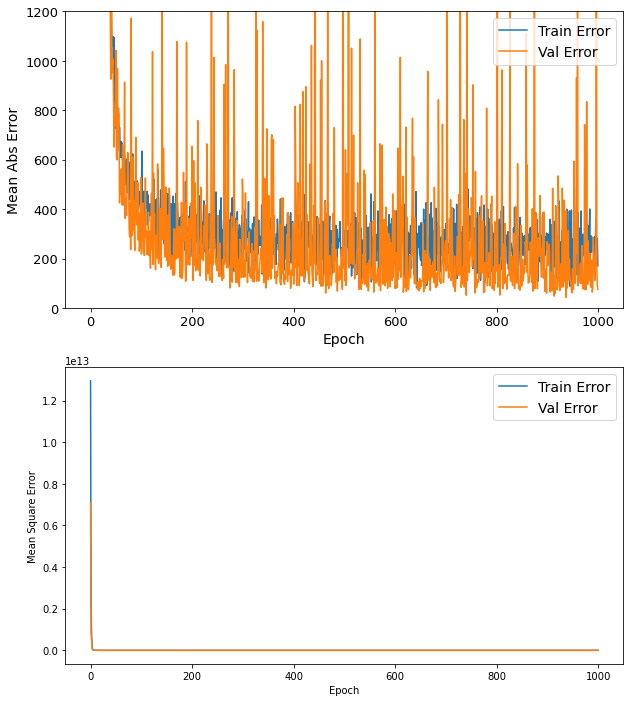

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,1200])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 27350.7637 - mae: 75.4717 - mse: 27350.7637 - 161ms/epoch - 882us/step
테스트 세트의 평균 절대 오차: 75.47 local1
